

This Notebook is a step by step tutorial on Deep Neural Netowrks. Learn more form the associated [YouTube Video](https://youtu.be/l-CjXFmcVzY)


Step by step tutorial:

1. Random Search
2. Evolutionary Algorthim
3. Gradient Descent
4. Deep Neural Networks
5. Embedded Convolutions (Bag of words)
6. Self-attention GPT (1 block 4 heads)
7. Reweight GPT (1 block 4 heads)

1 - Random Search

Minimum Error: 1.7847071463506488


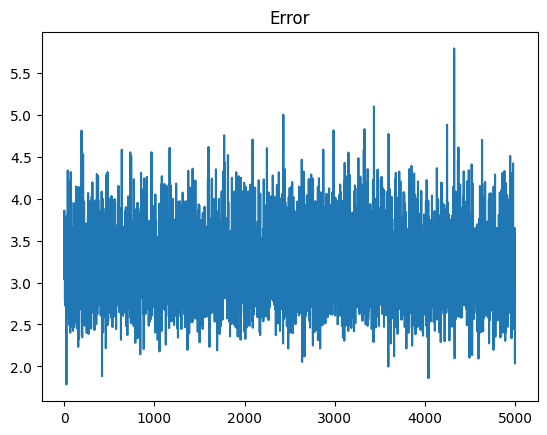

In [9]:
import numpy as np
import matplotlib.pylab as plt

xs = np.asarray([ [0, 1, 0, 1, 0],
                  [0, 0, 1, 1, 0],
                  [1, 1, 0, 1, 0],
                  [1, 1, 1, 0, 1],
                  [0, 0, 0, 1, 0]])

# ws = np.asarray([ 1, 0, 1, 0, -1]) ## hidden part

ys = np.asarray([ [0.0],
                  [1.0],
                  [1.0],
                  [1.0],
                  [0.0]])

ins = 5
outs = 1

def weights(ins, outs):
    ws = np.random.randn(ins, outs)*0.1
    return ws

ws = weights(ins, outs)

ers = []
for i in range(5000):
    
    yh = xs @ ws    
    e = yh - ys      
    e = np.sum(np.abs(e))
    
    if e < 0.05:
        print("solution reached!")
        break
    else:
        ws = weights(ins, outs)

    ers.append(e)

plt.figure(1)
plt.title("Error")
plt.plot(ers)
print("Minimum Error:", np.min(ers))

2 - Evolutionary Algorthim

solution reached!
Erorr: 0.04237643680561326
preidction: yhs
[[0.02]
 [1.  ]
 [1.01]
 [0.99]
 [0.  ]]


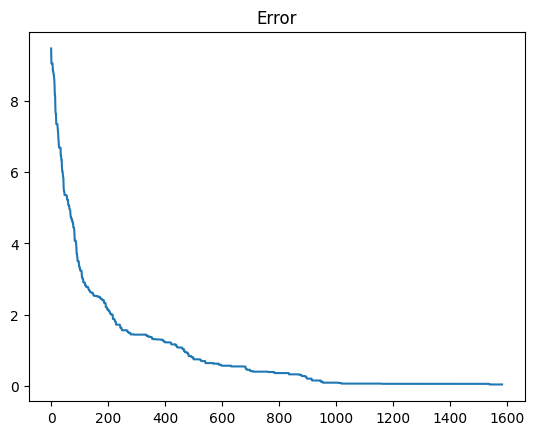

In [8]:
import numpy as np
import matplotlib.pylab as plt


xs = np.asarray([ [0, 1, 0, 1, 0],
                  [0, 0, 1, 1, 0],
                  [1, 1, 0, 1, 0],
                  [1, 1, 1, 0, 1],
                  [0, 0, 0, 1, 0]])

# ws = np.asarray([ 1, 0, 1, 0, -1]) ## hidden part

ys = np.asarray([ [0.0],
                  [1.0],
                  [1.0],
                  [1.0],
                  [0.0]])

xs = np.hstack( (xs , np.ones([xs.shape[0], 1]) )  )

ins = 5
outs = 1

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws

ws = weights(ins+1, outs)

ers = []
for i in range(5000):
    
    yh = xs @ ws    
    e = yh - ys
        
    e = np.sum(np.abs(e))
    if e < 0.05:
        print("solution reached!")
        break
    else:
        mutation = weights(ins+1, outs)*0.03
        cw = ws + mutation
        
        yh = xs @ cw    
        ce = yh - ys
        ce = np.sum(np.abs(ce))
        
        if ce < e:
            ws = cw

    ers.append(e)
        

plt.figure(1)
plt.title("Error")
plt.plot(ers)
print("Erorr:", e)
print("preidction: yhs")
print( np.round(yh, 2))

4 - Gradient Descent

solution reached!
preidction: yhs
[[ 0.01]
 [ 0.99]
 [ 0.99]
 [ 1.01]
 [-0.01]]


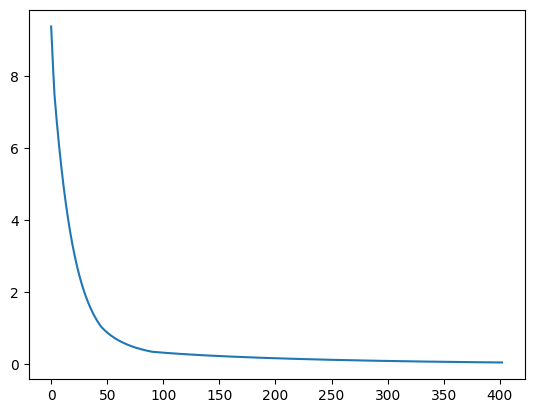

In [12]:
import numpy as np
import matplotlib.pylab as plt

xs = np.asarray([ [0, 1, 0, 1, 0],
                  [0, 0, 1, 1, 0],
                  [1, 1, 0, 1, 0],
                  [1, 1, 1, 0, 1],
                  [0, 0, 0, 1, 0]])

ys = np.asarray([ [0.0],
                  [1.0],
                  [1.0],
                  [1.0],
                  [0.0]])


xs = np.hstack( (xs , np.ones([xs.shape[0], 1]) )  )

ins = 5
outs = 1
nodes = 15

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws


w0 = weights(ins+1, nodes)
ws = weights(nodes, outs)

ers = []
for i in range(5000):
    
    z = xs @ w0
    x = np.sin(z)
    yh = x @ ws 
    
    e = (yh - ys) * 1 #derivative of x=1
    ws -= (x.T @ e) * 0.01
            
    e = np.sum(np.abs(e))
    
    if e < 0.05:
        print("solution reached!")
        break

    ers.append(e)
        

plt.figure(1)
plt.plot(ers)
print("preidction: yhs")
print( np.round(yh, 2))

5 - Deep Neural Networks (Numpy)

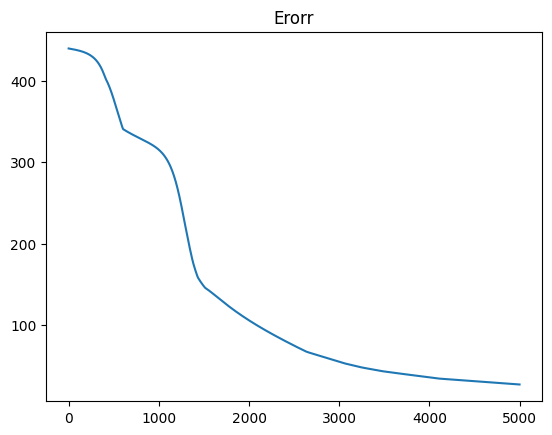

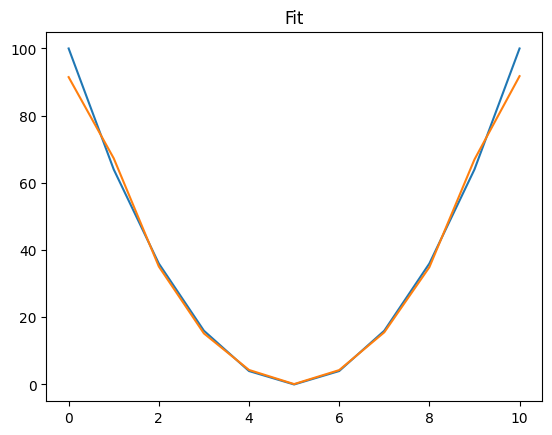

In [21]:
import numpy as np
import matplotlib.pylab as plt

xs = np.asarray([[-10], [-8], [-6], [-4],[-2],[0],[2], [4], [6], [8], [10]])
ys = xs**2

xs = np.hstack((xs , np.ones([xs.shape[0], 1]) ))

ins = 1
outs = 1
nodes = 100
lr = 0.000003

def weights(ins, outs):
    ws = np.random.randn(ins, outs)*0.1
    return ws

w0 = weights(ins+1, nodes)
w1 = weights(nodes, nodes)
w2 = weights(nodes, nodes)
w3 = weights(nodes, outs)

ers = []
x0 = xs
for i in range(5000):
    
    z0 = (x0 @ w0); x1 = np.sin(z0)    
    z1 = (x1 @ w1); x2 = np.sin(z1)     
    z2 = (x2 @ w2); x3 = np.sin(z2)
    
    yh = x3 @ w3
    
    e3 = (yh - ys) * 1 #derivative of x=1
    e2 = (e3 @ w3.T) * np.cos(z2)
    e1 = (e2 @ w2.T) * np.cos(z1)
    e0 = (e1 @ w1.T) * np.cos(z0)
    
    w0 -= (x0.T @ e0) * lr
    w1 -= (x1.T @ e1) * lr
    w2 -= (x2.T @ e2) * lr
    w3 -= (x3.T @ e3) * lr
       
    e3 = np.sum(np.abs(e3))
    ers.append(e3)
        
plt.figure(1)
plt.title("Erorr")
plt.plot(ers)
plt.figure(2)
plt.title("Fit")
plt.plot(ys)
plt.plot(yh)


6 - Deep Neural Networks (Pytorch)

0  loss: 2842.042724609375
1000  loss: 9.337769029116316e-07
2000  loss: 7.56036679376848e-05
3000  loss: 8.25223056555302e-10
4000  loss: 1.9382700999770464e-10
predicted yh for 4  is  15.992953300476074


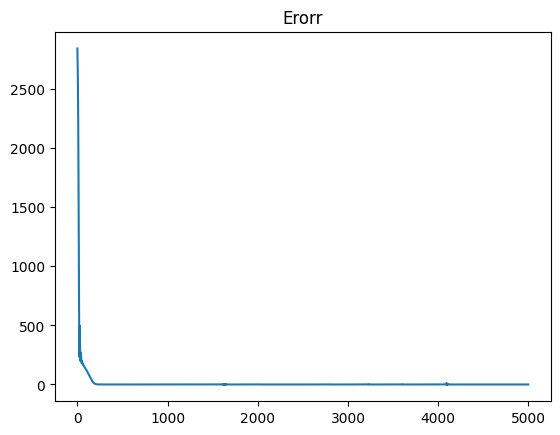

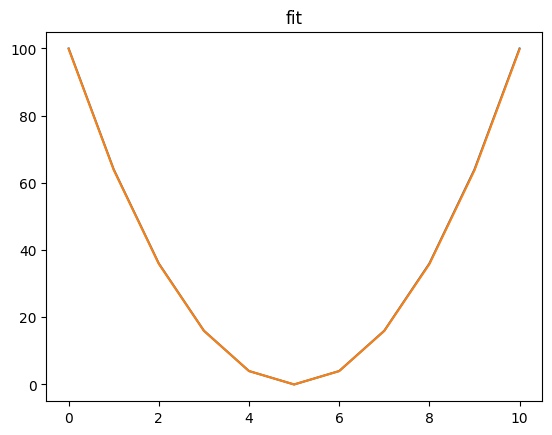

In [25]:
import numpy as np
import matplotlib.pylab as plt
import torch
import torch.nn as nn
from torch.nn import functional as F

xs = np.asarray([[-10], [-8], [-6], [-4],[-2],[0],[2], [4], [6], [8], [10]])
ys = xs**2 

ins = 1
outs = 1
nodes = 100
lr = 0.003

xs = torch.tensor(xs).float()
ys = torch.tensor(ys).float()
# add bias
xs = torch.hstack((xs, torch.ones([xs.shape[0], 1])))
   
params=[]
def weights(ins, outs):
    ws = torch.randn(ins, outs)*0.1
    ws.requires_grad_(True)
    params.append(ws)
    return ws

class Model():
    def __init__(self):
        self.w0 = weights(ins+1, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, nodes)
        self.w3 = weights(nodes, outs)
        
    def forward(self, x):
        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)
        x = torch.relu(x @ self.w2)
        yh = x @ self.w3    
        return yh
    
model = Model()
optimizer = torch.optim.Adam(params, lr)

ers = []
for it in range(5000):
    
    x = xs
 
    yh = model.forward(x) 
    loss = F.mse_loss(yh , ys) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    e = loss.item()
    if it%1000==0:
        print(it, " loss:", e)
        
    ers.append(e)
    
plt.figure(1)
plt.title("Erorr")
plt.plot(ers)

plt.figure(2)
plt.title("fit")
plt.plot(ys)
plt.plot(yh.detach())

x = 4
yh = model.forward(torch.tensor([[x, 1]]).float())
print("predicted yh for", x, " is ", yh.item())

Dataset: Cat Poem

In [32]:

text = '''
Cats, cats, everywhere
Furry balls without a care
Purring, meowing, licking fur
Hunting mice, they always purr

Cats, cats, on the prowl
Jumping high, never a scowl
Whiskers twitching, eyes alert
Tail in air, ready to assert

Cats, cats, so much fun
Cuddling close in the sun
Stretching out, napping long
Playing with string, never wrong

Cats, cats, always cool
Lapping milk, acting like a fool
Mysterious, charming, full of grace
Cats are simply ace

Cats, cats, with silky fur
Making biscuits, they always purr
Sitting high, looking down
Claiming everything as their crown

Cats, cats, with eyes so bright
Chasing shadows, day or night
Curled up warm, on your lap
Purring gently, taking a nap

Cats, cats, with playful paws
Hiding, stalking, never pause
Jumping, leaping, so agile
Graceful creatures, never fragile

Cats, cats, our feline friends
Bringing joy that never ends
Loving us, without a doubt
Cats are what life's all about

Cats, cats, everywhere I see
Furry creatures, cute as can be
Rubbing against our legs
Asking for treats, without begs

Cats, cats, with their regal stance
Graceful movements, they enhance
But we love them all the same
Our little friends, never tame

Cats, cats, so full of love
Watching over us from above
Protecting us from any harm
Always there, with their charm

Cats, cats, with their curious ways
Exploring nooks, and hiding in bays
Living life with style and grace
Cats are always in first place

Cats, cats, so full of fun
Chasing toys, never done
Hiding in boxes, or paper bags
Making us laugh, never drags

Cats, cats, with their own minds
Sitting in the sun, never blinds
Chasing strings, and balls of yarn
They never tire, oh what a charm

Cats, cats, with calming purrs
Cuddling close, to be yours
Giving love, without any fuss
Their presence, a comfort to us

Cats, cats, always at ease
Living life, as they please
Bringing joy, to all they meet
Cats, our furry friends, so sweet

Cats, cats, with eyes so bright
Guiding us through the darkest night
Purring softly, by our side
Comforting us, as we hide

Cats, cats, with softest fur
Nuzzling close, making a purr
In our lap, they take a rest
We're lucky to have, such a guest

Cats, cats, with their playful ways
Entertaining us, on the laziest days
Chasing shadows, or a feather
Making us smile, always together

Cats, cats, with hearts so pure
Bringing love, that will endure
Their presence, a blessing indeed
Cats, our friends, we shall never need

Cats, cats, with their little quirks
Scratching posts, and tiny perks
Licking paws, cleaning their face
Chasing tails, all over the place

Cats, cats, with their playful hearts
Chasing toys, and little carts
Their antics, bringing us joy
Cats, our little angels, oh so coy

Cats, cats, with their gentle souls
Lifting spirits, making us whole
In their eyes, we see the light
Bringing peace, that feels so right

Cats, cats, with their gentle purr
Calming us, when we're feeling a stir
Snuggling close, to keep us warm
Cats, our little cuddle storm

Cats, cats, with their playful heart
Jumping high, right from the start
Bouncing around, like little springs
Cats, our little entertainers, with wings

Cats, cats, with their loving grace
Their soft purrs, caress our face
In their embrace, we feel at peace
Cats, our little comfort, never to cease

Cats, cats, with their loving ways
Cuddling close, on the darkest days
In the garden, or up in a tree
Cats, our little explorers, always free

'''

text = text.lower()
chars = sorted(list(set(text)))
stoi = {ch:i for i,ch in enumerate(chars)}
itos = {i:ch for i,ch in enumerate(chars)}
data = [stoi[c] for c in text]
vocab_size = len(chars)

def generate_text(s, length):
    gen_text = ""
    for i in range(length):
        yh = model.forward(s)
        prob = F.softmax(yh[-1, :], dim=0)
        # pred = torch.argmax(yh).item()
        pred = torch.multinomial(prob, num_samples=1).item()        
        s = torch.roll(s, -1)
        s[-1] = pred
        gen_text += itos[pred]
    
    print(gen_text)


7- Neural Networks - Language Modeling

<ipython-input-29-eb8dc2f68988>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).float()


loss: 3.5730762481689453
loss: 1.8771331310272217
loss: 1.7316371202468872
loss: 0.9618238210678101
loss: 0.4742772579193115
loss: 0.3060353100299835
loss: 0.16358360648155212
loss: 0.11678619682788849
loss: 0.1092955693602562
loss: 0.08671177178621292


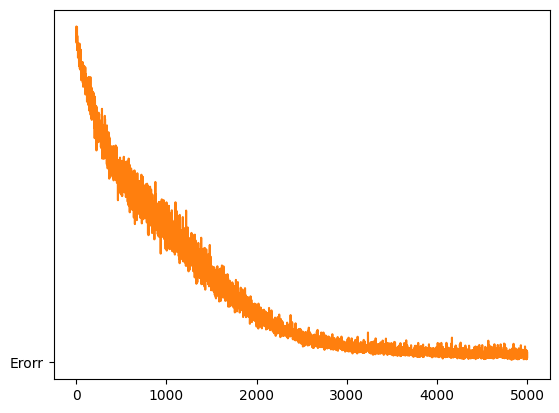

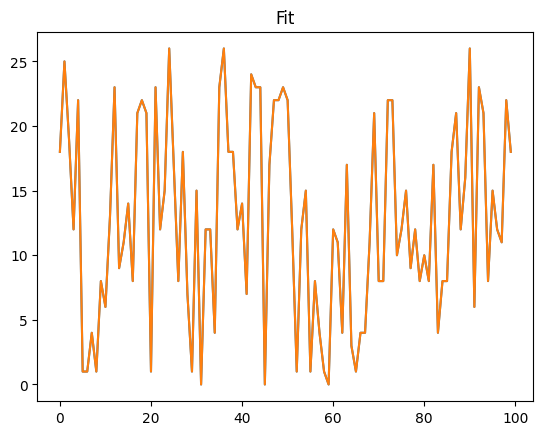

In [29]:

ins = 16
outs = vocab_size
nodes = 100
lr = 0.001

data = torch.tensor(data).float()

def weights(ins, outs):
    ws = torch.randn(ins, outs)*0.1
    ws.requires_grad_(True)
    params.append(ws)
    return ws

class Model():
    def __init__(self):
        self.w0 = weights(ins, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, outs)
        
    def forward(self, x):
        x = torch.sin(x @ self.w0)
        x = torch.sin(x @ self.w1)
        yh = x @ self.w2    
        return yh
    
model = Model()
optimizer = torch.optim.Adam(params, lr)

ers = []
for it in range(5000):
    
    b = torch.randint(len(data)-ins, (100,))
    xs = torch.stack([data[i:i+ins] for i in b])
    ys = torch.stack([data[i+ins:i+ins+1] for i in b])

    yh = model.forward(xs)      
    loss = F.cross_entropy(yh.view(-1, vocab_size) , ys.long().view(-1)) 
    optimizer.zero_grad()
    loss.backward()   
    optimizer.step()
    
    e = loss.item()
    if it%500==0:
        print("loss:", e)
        
    ers.append(e)
    
plt.figure(1)
plt.plot("Erorr")
plt.plot(ers)

plt.figure(2)
plt.title("Fit")
plt.plot(ys)
plt.plot(torch.argmax(yh.detach(), dim=-1))

8- Embbed Convolutions (Dummy sum of the outputs)

In [34]:
ins = 16
outs = vocab_size
nodes = 100
lr = 0.001

n_emb = 32
embed = torch.randn(vocab_size, n_emb)
pos = torch.randn(ins, n_emb)

data = torch.tensor(data).long()

params = [] 
def weights(ins, outs):
    ws = torch.randn(ins, outs)*0.1
    ws.requires_grad_(True)
    params.append(ws)
    return ws

class Head():
    def __init__(self):
        self.wv = weights(n_emb, n_emb//4)

    def forward(self, x):
        v = x @ self.wv
        attn = torch.ones(ins, ins) 
        tril = torch.tril(attn)
        tril = tril.masked_fill(tril == 0, -1e10)
        rew = F.softmax(tril, dim=-1)
        x = rew @ v
        return x        

class Model():
    def __init__(self):
        self.heads = [Head(), Head(), Head(), Head()]
        self.w0 = weights(n_emb, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, outs)
        
    def forward(self, x):
        x = embed[x] + pos
        x = torch.cat([head.forward(x) for head in self.heads], dim=-1)        
        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)
        yh = x @ self.w2    
        return yh
    
model = Model()

optimizer = torch.optim.Adam(params, lr)

for it in range(5000):
    
    b = torch.randint(len(data)-ins, (100,))
    xs = torch.stack([data[i:i+ins] for i in b])
    ys = torch.stack([data[i+1:i+ins+1] for i in b])

    yh = model.forward(xs)
    loss = F.cross_entropy(yh.view(-1, vocab_size) , ys.long().view(-1)) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    e = loss.item()
    if it%1000==0:
        print(it, "loss:", e)
            
generate_text(xs[0], 500)

<ipython-input-34-c0023120a6cc>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).long()


0 loss: 3.409367322921753
1000 loss: 2.288846492767334
2000 loss: 2.1395888328552246
3000 loss: 1.9701178073883057
4000 loss: 1.8382596969604492
, hewlin n nsgeeddc
hejthaa,a,s oi  dlsy naegsir
s  ifu
catastt,arss t boou 
crilurtpning ee gs
e ululs mo
wl iarishnwetgevyk
 oati unhaf,epn a
cgounett reu s ral
c lbw iitnsghiiingn,  g ttllkkeahno aces
iigf,nga hsa tr
cacatswt,i,s  t htebcailrneegr t fes,i as

ccaotrr  ut sats uro
efrr neciif r eraess
sunr bci, gintim ewik hkguf,ura
srl
at cc c tastsoe,,hura  lcvoawelyeme, et r
ili  o bltepaenngd
rivefaj uslilnignge,,  vawgierhr
cyacee  hef
aacctusui trrns rae,dya, we gcafysnnue
rlteigeg , h a


9- Self-Attention GPT 

In [35]:
ins = 16
outs = vocab_size
nodes = 100
lr = 0.001

n_emb = 32
embed = torch.randn(vocab_size, n_emb)
pos = torch.randn(ins, n_emb)

data = torch.tensor(data).long()

params = [] 
def weights(ins, outs):
    ws = torch.randn(ins, outs)*0.1
    ws.requires_grad_(True)
    params.append(ws)
    return ws

class Head():
    def __init__(self):
        self.wv = weights(n_emb, n_emb//4)
        self.wk = weights(n_emb, n_emb//4)
        self.wq = weights(n_emb, n_emb//4)
    
    def forward(self, x):
        v = x @ self.wv
        k = x @ self.wk
        q = x @ self.wq
        attn = (q @ k.transpose(-2, -1)) / k.shape[0]**0.5
        tril = torch.tril(attn)
        tril = tril.masked_fill(tril == 0, -1e10)
        rew = F.softmax(tril, dim=-1)
        x = rew @ v
        return x        

class Model():
    def __init__(self):
        self.heads = [Head(), Head(), Head(), Head()]
        self.w0 = weights(n_emb, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, outs)
        
    def forward(self, x):
        x = embed[x] + pos
        x = torch.cat([head.forward(x) for head in self.heads], dim=-1)        
        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)
        yh = x @ self.w2    
        return yh
    
model = Model()
optimizer = torch.optim.Adam(params, lr)

for it in range(5000):
    
    b = torch.randint(len(data)-ins, (100,))
    xs = torch.stack([data[i:i+ins] for i in b])
    ys = torch.stack([data[i+1:i+ins+1] for i in b])

    yh = model.forward(xs)
    loss = F.cross_entropy(yh.view(-1, vocab_size) , ys.long().view(-1)) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    e = loss.item()
    if it%1000==0:
        print(it, "loss:", e)
            
generate_text(xs[0], 1000)

<ipython-input-35-73d08dee2ade>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).long()


0 loss: 3.3819174766540527
1000 loss: 1.458566427230835
2000 loss: 1.1458195447921753
3000 loss: 0.9786666035652161
4000 loss: 0.8160243034362793
ith so eres, and their grdinny ho em all ough, leaping cle their an their eyes, with so em ans, oe lick ie swel
inb calming cle sumping sool
insting closeir anse
 cats, and ho e
cats, cats, with so emyekys
cats, cats, wieky feet ee in their govokts, aet, their govokts, aet, eease
chasserting hiding soookks

cats, cats, cat whigs
cats, cats, cat whiyky feed uldthrom their eyest hat whols, cat uul m all ong
purring hing in their gassing makke i bing in their eyes, aile, and brig urlds, aery bags
cats, cat with so e gassil, always cat uuir, laking pirks
culile, and ho e
cats, cats, easing lick, cat wioous, hee
chasile, and 
cats, cats, and 
cats, cat eir onig hiding us, like puch s with so em anys their gassil, cat we ends, cat whigs
ast

cats, cats, cats, naning hing phat wamil, cat wals, cat wats, cat wail, cat wat hearl creature
s cats, cat w

10- Reweight GPT

In [36]:
ins = 16
outs = vocab_size
nodes = 100
lr = 0.001

n_emb = 32
embed = torch.randn(vocab_size, n_emb)
pos = torch.randn(ins, n_emb)

data = torch.tensor(data).long()

params = [] 
def weights(ins, outs):
    ws = torch.randn(ins, outs)*0.1
    ws.requires_grad_(True)
    params.append(ws)
    return ws

class Head():
    def __init__(self):
        self.wv = weights(n_emb, n_emb//4)
        self.wr = weights(n_emb, ins)
    
    def forward(self, x):
        v = x @ self.wv
        attn = x @ self.wr
        tril = torch.tril(attn)
        tril = tril.masked_fill(tril == 0, -1e10)
        rew = F.softmax(tril, dim=-1)
        x = rew @ v
        return x        

class Model():
    def __init__(self):
        self.heads = [Head(), Head(), Head(), Head()]
        self.w0 = weights(n_emb, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, outs)
        
    def forward(self, x):
        x = embed[x] + pos
        x = torch.cat([head.forward(x) for head in self.heads], dim=-1)        
        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)
        yh = x @ self.w2    
        return yh
    
model = Model()
optimizer = torch.optim.Adam(params, lr)

for it in range(5000):
    
    b = torch.randint(len(data)-ins, (100,))
    xs = torch.stack([data[i:i+ins] for i in b])
    ys = torch.stack([data[i+1:i+ins+1] for i in b])

    yh = model.forward(xs)
    loss = F.cross_entropy(yh.view(-1, vocab_size) , ys.long().view(-1)) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    e = loss.item()
    if it%1000==0:
        print(it, "loss:", e)
            
generate_text(xs[0], 1000)

<ipython-input-36-15ddcf9fd435>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).long()


0 loss: 3.428614616394043
1000 loss: 1.3364874124526978
2000 loss: 1.0042471885681152
3000 loss: 0.7686685919761658
4000 loss: 0.6798168420791626
yes all abouts, making poarm
cats, with their loving agile
gracming strace, they ever bringethere, or up in face
their a st
we're lucky the scomfole
in ther
making us softly, byhing in face
comfort, napping, never dres, that will oving when yout angethere, we hiding ehbruggrace, they they ever us frouls
lifting, neverythhigh, right fur
makokving close

cats, cats, with their gentle pure
their presence, a there fragile
graceful creats at a comfort, nevery
cats, cats, so full of love
watching in throut as their chance
their playful high, never wrong

cats, cats, our frubbingihoing, meer ends
chasing toys, our legs
askert
taining bairits, enhan, never talwlayful hiding, street

cats, cats, with calming us from ther
nuzs together
making tring us softest
chasing in the life'ing mire, meowing, maky love, such soft purrs, days
enter against pur
chas

For the a more complete multi-block GPT checkout reweight-gpt.py file.